In [1]:
import FalseColor_methods as fc 
from FCdataobject import DataObject
import h5py as hp
import numpy as np
import tifffile as tf
import os 
import json
import glob
import skimage.filters as filt
import time
import skimage.morphology as morph
import skimage.feature as feat
%matplotlib notebook
import matplotlib.pyplot as plt


/Users/robertserafin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
datapath = os.path.join(os.getcwd(),'h5_sample_data')
datafile = os.path.join(datapath,'data-f0.h5')

testData = DataObject(directory=datapath)

In [14]:
testData.setupH5data(folder=datapath)

['__DATA_TYPES__', 's00', 's01', 't00000']
<HDF5 dataset "cells": shape (1025, 717, 1025), type "<i2">
<HDF5 dataset "cells": shape (1025, 717, 1025), type "<i2">


In [4]:
whos

Variable     Type          Data/Info
------------------------------------
DataObject   type          <class 'FCdataobject.DataObject'>
datafile     str           /Users/robertserafin/Desk<...>h5_sample_data/data-f0.h5
datapath     str           /Users/robertserafin/Desk<...>e Coloring/h5_sample_data
fc           module        <module 'FalseColor_metho<...>g/FalseColor_methods.py'>
feat         module        <module 'skimage.feature'<...>age/feature/__init__.py'>
filt         module        <module 'skimage.filters'<...>age/filters/__init__.py'>
glob         module        <module 'glob' from '/Use<...>3/lib/python3.6/glob.py'>
hp           module        <module 'h5py' from '/Use<...>ckages/h5py/__init__.py'>
json         module        <module 'json' from '/Use<...>hon3.6/json/__init__.py'>
morph        module        <module 'skimage.morpholo<...>/morphology/__init__.py'>
np           module        <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
os           module        <module 

In [5]:
colorSingle_runnable = {'runnable' : fc.singleChannel_falseColor}
falseColor_runnable = {'runnable' : fc.falseColor}
preprocess_runnable = {'runnable' : fc.preProcess}
combine_runnable = {'runnable' : fc.combineFalseColoredChannels}

In [11]:
channel_IDs = ['s00', 's01']

# for chan in channel_IDs:
#     testData.imageSet[chan]['data'] = testData.imageSet[chan]['data'][:400]
#     print(testData.imageSet[chan]['data'].shape)

(400, 717, 1025)
(400, 717, 1025)


In [15]:
t0 = time.time()
false_colored_data = testData.processImages(colorSingle_runnable,channel_IDs)
false_colored_data = testData.processImages(combine_runnable,channel_IDs,imageSet=false_colored_data,singleSet=False)
print(time.time() - t0)

s00
s01
546.933089017868


<IPython.core.display.Javascript object>


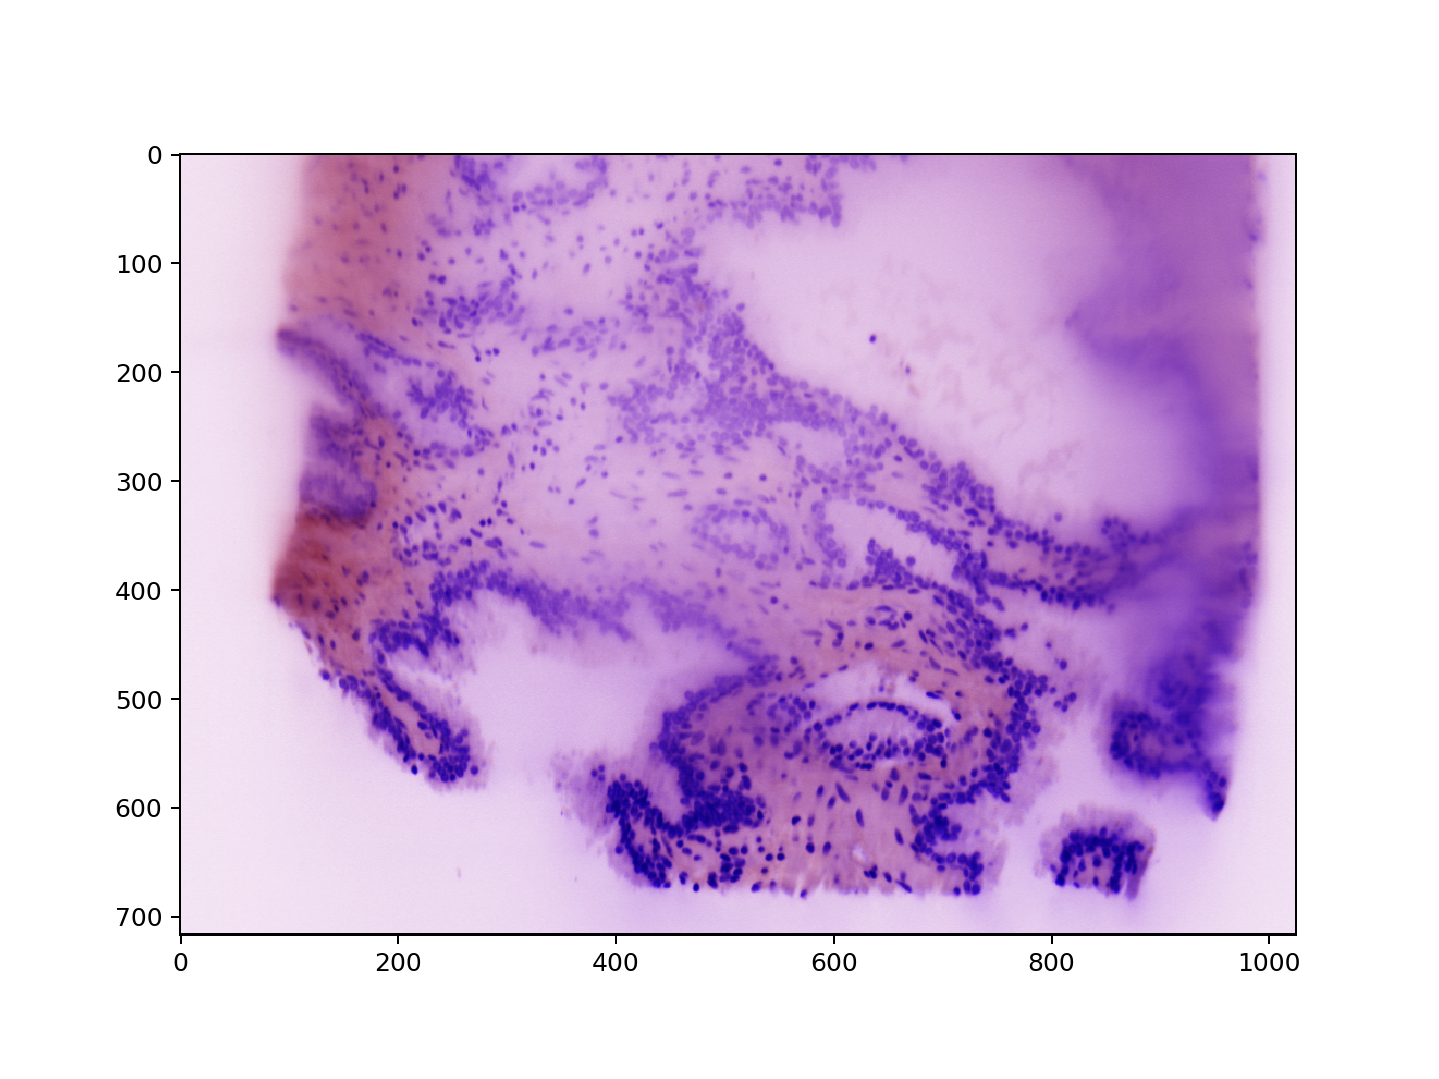

In [13]:
plt.subplots(figsize = (8,6))
plt.imshow(false_colored_data[200])

In [ ]:
t = time.time()
a = np.array(list(zip(false_colored_data['s00'],false_colored_data['s01'])))
print(time.time() - t)

In [ ]:
a[0].shape

In [ ]:
cyto = false_colored_data['s01']
print(cyto.dtype)
nuclei = false_colored_data['s00']

final_data = fc.combineFalseColoredChannels(cyto,nuclei,norm_factor=255,output_dtype=cyto.dtype)

<IPython.core.display.Javascript object>


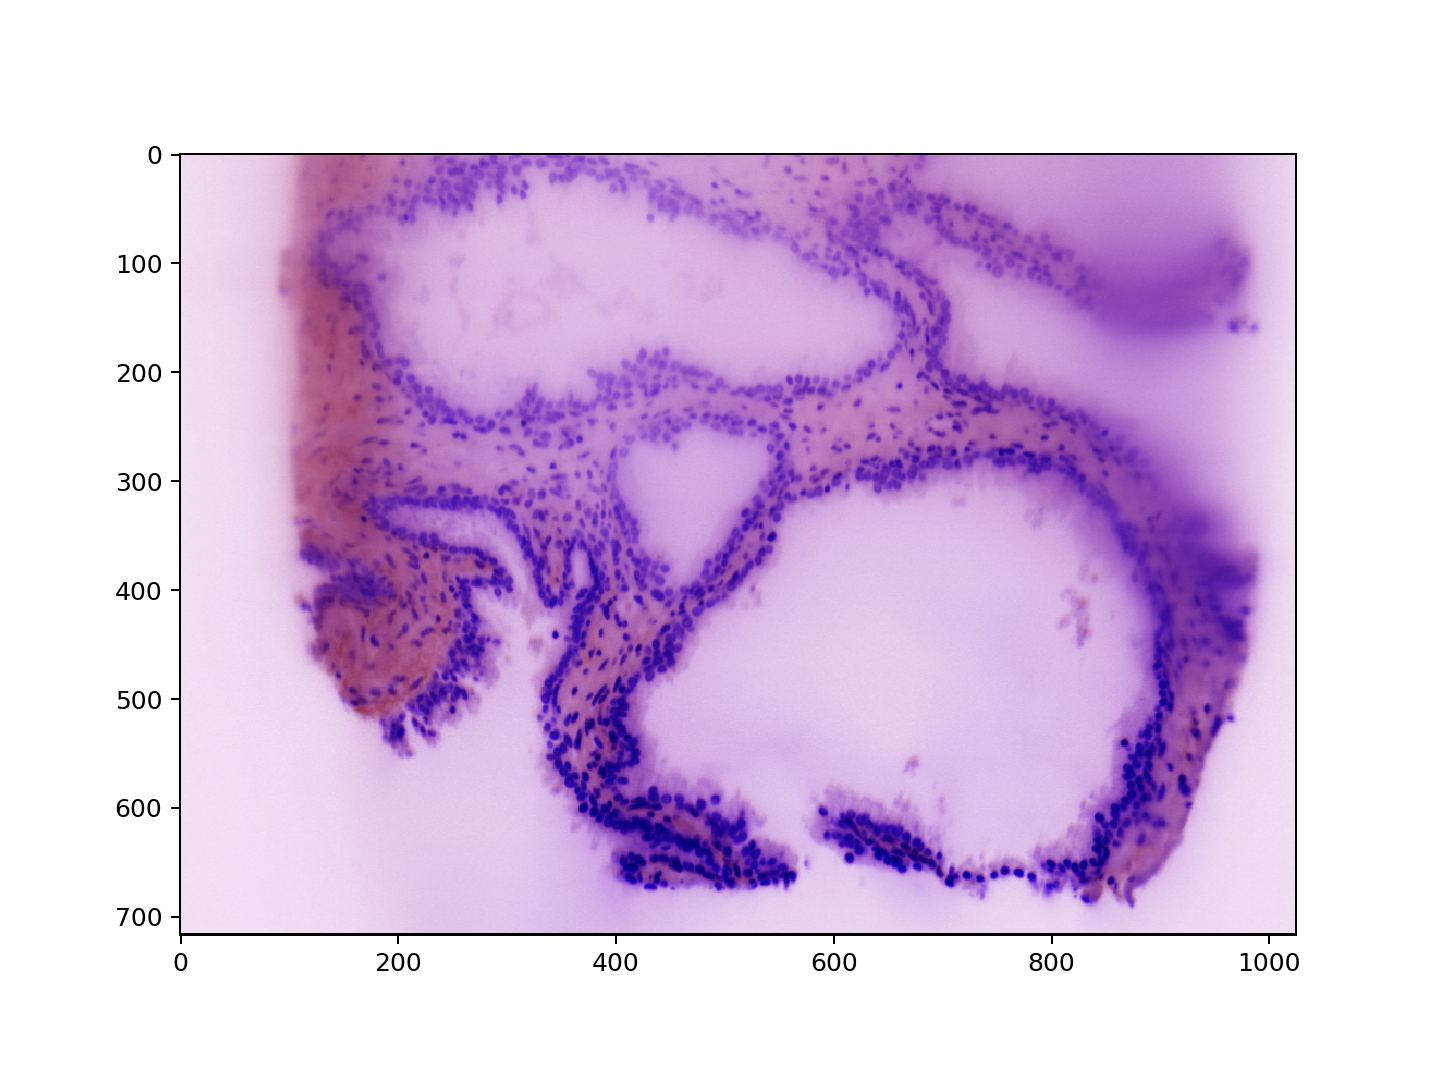

In [9]:
plt.subplots(figsize = (8,6))
plt.imshow(false_colored_data[10])

In [16]:
false_colored_data = None

In [ ]:
testimg1 = test['t00000']['s01']['0']['cells']

In [ ]:
testimg = test['t00000']['s00']['0']['cells']

In [ ]:
a = testData.imageSet['s00']['data']
np.array(list(zip(a,a)))

In [ ]:
test = np.arange(10)
np.power(test,0.85)

In [17]:
t = time.time()
for i in range(len(testData.imageSet['s00']['data'])):
    if (i % 50) == 0:
        print(i)
    nuclei = testData.imageSet['s00']['data'][i]
    cyto = testData.imageSet['s01']['data'][i]
    fc.falseColor(cyto,nuclei,channel_IDs)
print(time.time() - t)

0


/Users/robertserafin/Desktop/Image_analysis_codebase/False Coloring/FalseColor_methods.py:171: RuntimeWarning: invalid value encountered in power
  images = numpy.power(images,0.85)
/Users/robertserafin/Desktop/Image_analysis_codebase/False Coloring/FalseColor_methods.py:173: RuntimeWarning: invalid value encountered in greater
  image_mean = numpy.mean(images[images>thresh])*8
/Users/robertserafin/Desktop/Image_analysis_codebase/False Coloring/FalseColor_methods.py:177: RuntimeWarning: invalid value encountered in less
  processed_images[processed_images < 0] = 0


50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
478.31067419052124


In [22]:
t = time.time()
a = np.stack((testData.imageSet['s00']['data'],testData.imageSet['s01']['data']),axis=-1)
print(time.time() - t)

31.400497913360596


In [28]:
a.shape

(1025, 717, 1025, 2)

<IPython.core.display.Javascript object>


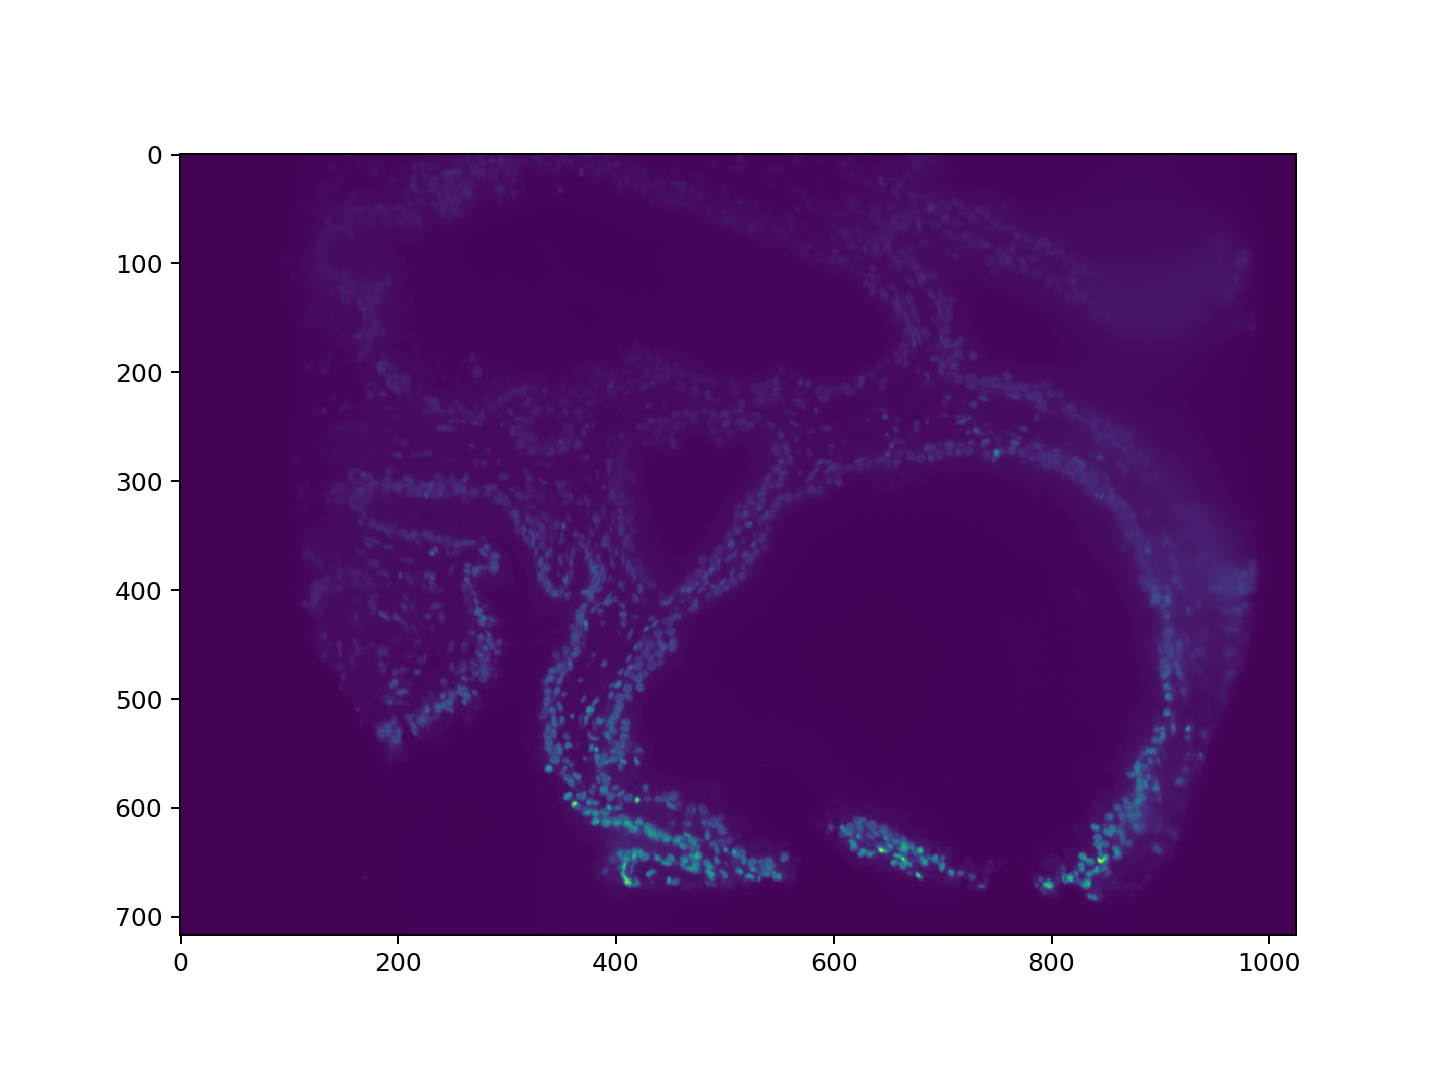

In [27]:
plt.subplots(figsize = (8,6))
plt.imshow(a[0][:,:,0])